ref https://www.backtrader.com/home/helloalgotrading/

A classic Simple Moving Average Crossover strategy, 
can be easily implemented and in different ways. 
The results and the chart are the same for the three snippets presented below.

Buy/ Sell

In [5]:
import yfinance as yf
from datetime import datetime
import backtrader as bt

In [6]:
mfst = yf.Ticker("MFST")
hist = mfst.history(period="max")
data = bt.feeds.PandasData(dataname=hist)

<IPython.core.display.Javascript object>


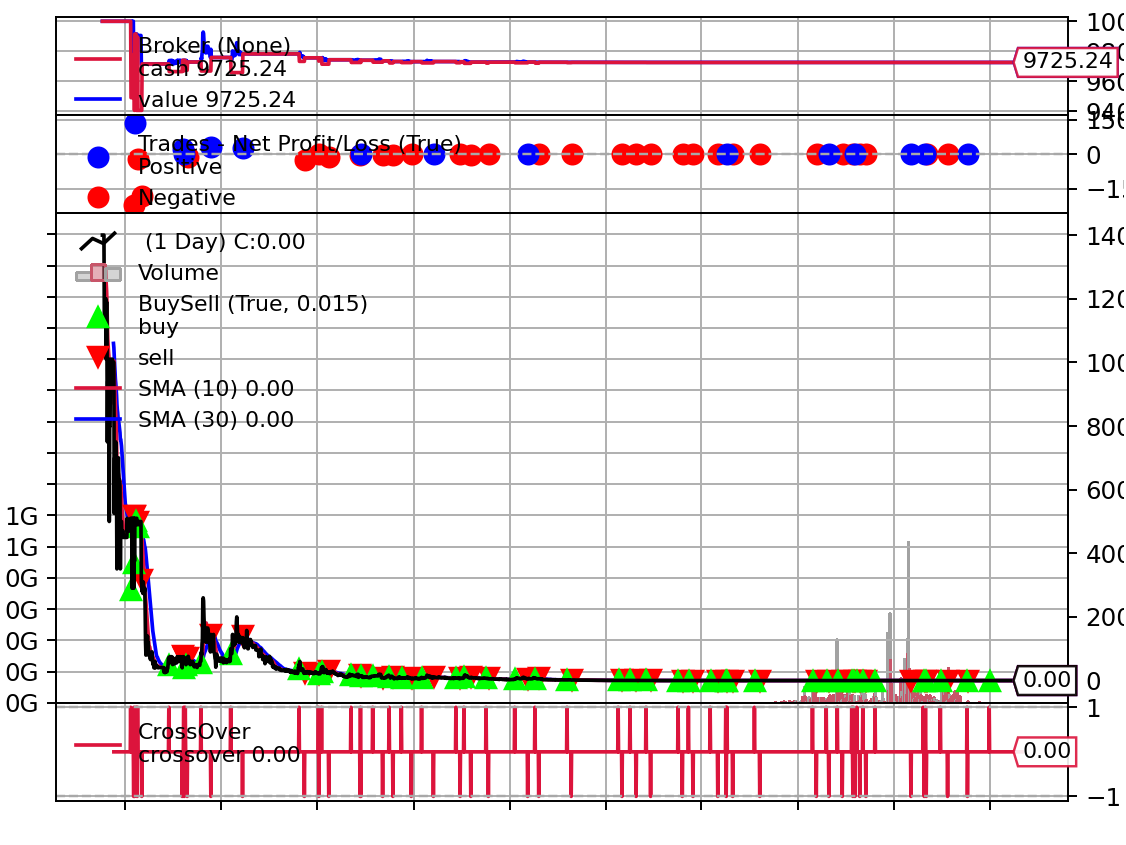

[[<Figure size 640x480 with 5 Axes>]]

In [7]:
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2011, 1, 1),
#                                  todate=datetime(2012, 12, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

Target Orders

<IPython.core.display.Javascript object>


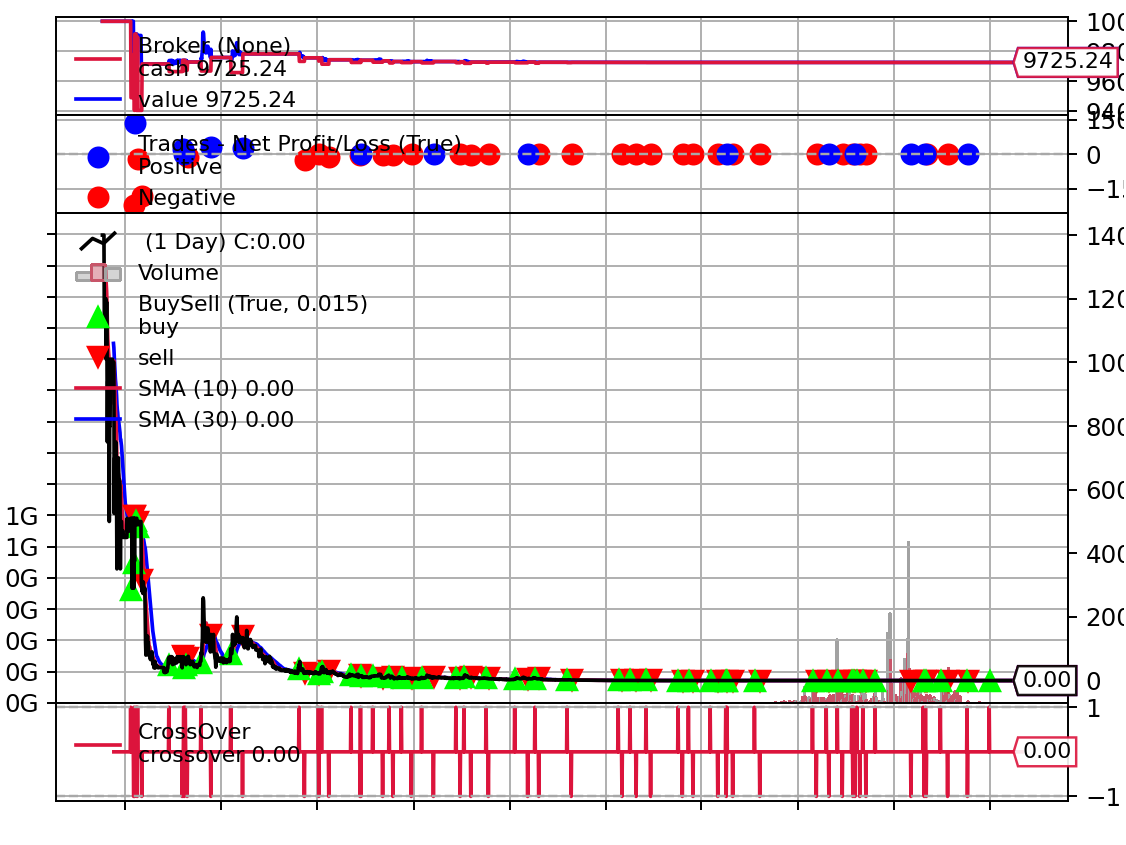

[[<Figure size 640x480 with 5 Axes>]]

In [8]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.order_target_size(target=1)  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.order_target_size(target=0)  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
# Signals

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

Signals

<IPython.core.display.Javascript object>


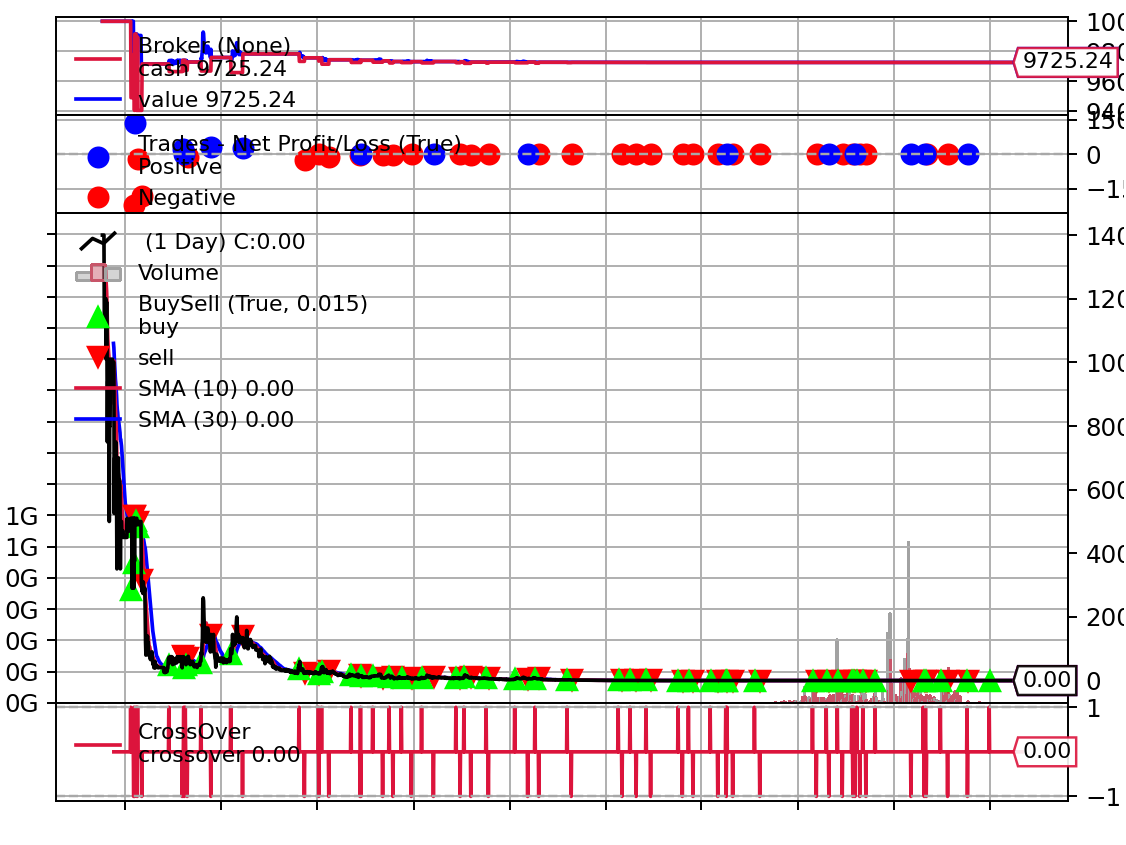

[[<Figure size 640x480 with 5 Axes>]]

In [9]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.order_target_size(target=1)  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.order_target_size(target=0)  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2011, 1, 1),
#                                  todate=datetime(2012, 12, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command